In [56]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)

# Oil and Gas Production and Emissions Data on the Norwegian Continental Shelf

## Part 3: Data Processing

---

This notebook is part of a series of notebooks. The series consist of other following parts:

#### Part 1: [Data Collection](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/01_data_building/01_production_and_emission_data_building.ipynb)

#### Part 2: [Data Cleaning](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/02_data_cleaning/02_production_and_emission_data_cleaning.ipynb)

---


This notebook aims to process the cleaned data from the previous notebook. It's based on the main dataframe called `fields_prod_emissions_1997_2023.csv`. The data will be processed to create statistics and visualizations that will help to understand the emissions, production and carbon intensity of Norwegian Oil and Gas production better. The dataframe contains over 60 different columns. A description follows.


### Table of Contents

1. [Data Loading](#data_loading)
2. [Data Description](#data_description)
3. [Data Analysis](#data_analysis)
4. [Data Processing](#data_processing)
5. [Data Visualization](#data_visualization)


### Data Loading


In [2]:
# Importing the dataset from the csv file
url_path = (
    "https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/"
)
filename = (
    "/data/output/emissions_and_production/cleaned/fields_prod_emissions_1997_2023.csv"
)

# Creating a check if import is successful
try:
    fields_prod_emissions_1997_2023_df = pd.read_csv("".join([url_path, filename]))
    print("Data import successful")
except:
    print("Data import failed")

Data import successful


In [3]:
fields_prod_emissions_1997_2023_df.info()
fields_prod_emissions_1997_2023_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   field                                       1803 non-null   object 
 1   year                                        1803 non-null   int64  
 2   net_oil_prod_yearly_mill_sm3                1803 non-null   float64
 3   net_gas_prod_yearly_bill_sm3                1803 non-null   float64
 4   net_ngl_prod_yearly_mill_sm3                1803 non-null   float64
 5   net_condensate_prod_yearly_mill_sm3         1803 non-null   float64
 6   net_oil_eq_prod_yearly_mill_sm3             1803 non-null   float64
 7   produced_water_yearly_mill_sm3              1803 non-null   float64
 8   field_id                                    1803 non-null   int64  
 9   net_oil_prod_monthly_sm3_volatility         1803 non-null   float64
 10  net_gas_prod

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe
0,statfjord nord,1997,3.93531,0.17288,0.09230,0.00000,4.20051,0.0,43679,0.053898,0.000405,0.000334,0.000000,0.054005,0.0,Producing,Producing,21084.0,statfjord,True,27.5,15.0,241.75,65.030121,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,9.0,0.0,4.0,0.0,13.0,0.0,17.0,2888.8,0.000000,285.0,0.000000,255.0,2946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 50.0, 'Mo...","{'Equinor ASA': 1.875, 'Mobil Development Norw...",3.72,0.23,0.05,0.0,4.05,44.12,2.37,1.12,0.00,48.62
1,veslefrikk,1997,3.47468,0.13919,0.08596,0.00000,3.69981,0.0,43618,0.052851,0.008952,0.005461,0.000000,0.053418,0.0,Producing,Shut down,21212.0,veslefrikk,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,69.0,6.0,36.0,111.0,0.0,3317.0,0.000000,175.0,0.000000,229.0,0.0,156.20492,993246905.0,equinor energy as,64.319881,973.4661,88.599389,2782760.0,"{'Den norske stats oljeselskap a.s': 55.0, 'To...","{'Equinor ASA': 55.0, 'TotalEnergies EP Norge'...",0.00,0.00,0.00,0.0,0.00,55.34,4.19,1.81,0.00,62.97
2,frøy,1997,1.39602,0.28878,0.00000,0.01732,1.70211,0.0,43597,0.026260,0.005287,0.000000,0.000942,0.030860,0.0,Producing,Shut down,3810636.0,frigg,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,6.0,0.0,6.0,12.0,0.0,3352.2,70.481913,120.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 53.96, 'T...","{'Equinor ASA': 53.96, 'TotalEnergies EP Norge...",0.00,0.00,0.00,0.0,0.00,5.55,1.61,0.00,0.11,7.27
3,hod,1

### Data Description


#### Field Information

| Field              | Description                     | Unit    | Note |
| ------------------ | ------------------------------- | ------- | ---- |
| field              | Name of the field               | string  | -    |
| year               | Year of data                    | numeric | -    |
| field_id           | Unique identifier for the field | numeric | -    |
| status             | Status of the field             | string  | -    |
| current_status     | Current status of the field     | string  | -    |
| field_owner        | Owner of the field              | string  | -    |
| processing_field   | Processing field                | string  | -    |
| field_in_emissions | Field emissions status          | boolean | -    |

#### Production Data

| Field                               | Description                          | Unit           | Note |
| ----------------------------------- | ------------------------------------ | -------------- | ---- |
| net_oil_prod_yearly_mill_sm3        | Net oil production yearly            | million $sm^3$ | -    |
| net_gas_prod_yearly_bill_sm3        | Net gas production yearly            | billion $sm^3$ | -    |
| net_ngl_prod_yearly_mill_sm3        | Net NGL production yearly            | million $sm^3$ | -    |
| net_condensate_prod_yearly_mill_sm3 | Net condensate production yearly     | million $sm^3$ | -    |
| net_oil_eq_prod_yearly_mill_sm3     | Net oil equivalent production yearly | million $sm^3$ | -    |
| produced_water_yearly_mill_sm3      | Produced water yearly                | million $sm^3$ | -    |

#### Production Volatility

| Field                                      | Description                                      | Unit   | Note |
| ------------------------------------------ | ------------------------------------------------ | ------ | ---- |
| net_oil_prod_monthly_sm3_volatility        | Net oil production monthly volatility            | $sm^3$ | -    |
| net_gas_prod_monthly_sm3_volatility        | Net gas production monthly volatility            | $sm^3$ | -    |
| net_ngl_prod_monthly_sm3_volatility        | Net NGL production monthly volatility            | $sm^3$ | -    |
| net_condensate_prod_monthly_sm3_volatility | Net condensate production monthly volatility     | $sm^3$ | -    |
| net_oil_eq_prod_monthly_sm3_volatility     | Net oil equivalent production monthly volatility | $sm^3$ | -    |
| produced_water_in_field_volatility         | Produced water in field volatility               | $sm^3$ | -    |

#### Facilities Information

| Field                       | Description                                  | Unit   | Note |
| --------------------------- | -------------------------------------------- | ------ | ---- |
| facilities_lifetime_mean    | Mean lifetime of facilities                  | years  | -    |
| facilities_lifetime_std     | Standard deviation of facilities lifetime    | years  | -    |
| facilities_water_depth_mean | Mean water depth of facilities               | meters | -    |
| facilities_water_depth_std  | Standard deviation of facilities water depth | meters | -    |

#### Facilities Status

| Field                        | Description                             | Unit    | Note |
| ---------------------------- | --------------------------------------- | ------- | ---- |
| subsea_facilites_shut_down   | Number of subsea facilities shut down   | numeric | -    |
| surface_facilites_shut_down  | Number of surface facilities shut down  | numeric | -    |
| subsea_facilites_in_service  | Number of subsea facilities in service  | numeric | -    |
| surface_facilites_in_service | Number of surface facilities in service | numeric | -    |

#### Facility Types

| Field                               | Description                          | Unit    | Note |
| ----------------------------------- | ------------------------------------ | ------- | ---- |
| facility_kind_multi well template   | Facility type: multi well template   | numeric | -    |
| facility_kind_single well template  | Facility type: single well template  | numeric | -    |
| facility_kind_offshore wind turbine | Facility type: offshore wind turbine | numeric | -    |
| facility_kind_subsea structure      | Facility type: subsea structure      | numeric | -    |
| facility_kind_fpso                  | Facility type: FPSO                  | numeric | -    |
| facility_kind_jacket 8 legs         | Facility type: jacket with 8 legs    | numeric | -    |
| facility_kind_condeep monoshaft     | Facility type: condeep monoshaft     | numeric | -    |
| facility_kind_loading system        | Facility type: loading system        | numeric | -    |
| facility_kind_jacket 4 legs         | Facility type: jacket with 4 legs    | numeric | -    |
| facility_kind_jacket tripod         | Facility type: jacket tripod         | numeric | -    |
| facility_kind_fsu                   | Facility type: FSU                   | numeric | -    |
| facility_kind_semisub steel         | Facility type: semisub steel         | numeric | -    |
| facility_kind_condeep 4 shafts      | Facility type: condeep with 4 shafts | numeric | -    |
| facility_kind_landfall              | Facility type: landfall              | numeric | -    |
| facility_kind_tlp concrete          | Facility type: TLP concrete          | numeric | -    |
| facility_kind_jack-up 3 legs        | Facility type: jack-up with 3 legs   | numeric | -    |
| facility_kind_jacket 6 legs         | Facility type: jacket with 6 legs    | numeric | -    |
| facility_kind_tlp steel             | Facility type: TLP steel             | numeric | -    |
| facility_kind_semisub concrete      | Facility type: semisub concrete      | numeric | -    |
| facility_kind_mopustor              | Facility type: mopustor              | numeric | -    |
| facility_kind_spar                  | Facility type: spar                  | numeric | -    |

#### Well Status

| Field                          | Description                              | Unit    | Note                     |
| ------------------------------ | ---------------------------------------- | ------- | ------------------------ |
| well_status_closed             | Well status: closed                      | numeric | total accumulated yearly |
| well_status_drilling           | Well status: drilling                    | numeric | total accumulated yearly |
| well_status_injecting          | Well status: injecting                   | numeric | total accumulated yearly |
| well_status_junked             | Well status: junked                      | numeric | total accumulated yearly |
| well_status_online/operational | Well status: online/operational          | numeric | total accumulated yearly |
| well_status_p&a                | Well status: P&A (plugged and abandoned) | numeric | total accumulated yearly |
| well_status_plugged            | Well status: plugged                     | numeric | total accumulated yearly |
| well_status_producing          | Well status: producing                   | numeric | total accumulated yearly |
| well_status_suspended          | Well status: suspended                   | numeric | total accumulated yearly |

#### Well Purpose

| Field                    | Description               | Unit    | Note |
| ------------------------ | ------------------------- | ------- | ---- |
| well_purpose_injection   | Well purpose: injection   | numeric | -    |
| well_purpose_observation | Well purpose: observation | numeric | -    |
| well_purpose_production  | Well purpose: production  | numeric | -    |

#### Well Information

| Field                          | Description                                         | Unit    | Note                         |
| ------------------------------ | --------------------------------------------------- | ------- | ---------------------------- |
| well_subsea_no                 | Well subsea: no                                     | boolean |                              |
| well_subsea_yes                | Well subsea: yes                                    | boolean |                              |
| well_final_vertical_depth_mean | Mean final vertical depth of wells                  | meters  | average for field            |
| well_final_vertical_depth_std  | Standard deviation of final vertical depth of wells | meters  | standard deviation for field |
| well_water_depth_mean          | Mean water depth of wells                           | meters  | average for field            |
| well_water_depth_std           | Standard deviation of water depth of wells          | meters  | standard deviation for field |

#### Financial and Environmental Data

| Field                            | Description                                       | Unit              | Note |
| -------------------------------- | ------------------------------------------------- | ----------------- | ---- |
| investments_mill_nok             | Investments                                       | million NOK       | -    |
| future_investments_mill_nok      | Future investments                                | million NOK       | -    |
| yearly_co2_emissions_1000_tonnes | Yearly CO2 emissions                              | 1000 tonnes       | -    |
| yearly_ch4_emissions_tons        | Yearly CH4 emissions                              | tons              | -    |
| yearly_nox_emissions_tons        | Yearly emissions                                  | tons              | -    |
| yearly_oil_spill_emissions_tons  | Yearly oil spill emissions                        | tons              | -    |
| yearly_water_emissions_m3        | Yearly water emissions                            | cubic meters (m3) | -    |
| org_number                       | Organization number                               | numeric           | -    |
| operator                         | Operator of the field                             | string            | -    |
| ownership_original               | Ownership structure, as reported                  | object            | -    |
| ownership_new_name               | Ownership structure, cleaned (mostly due to M&As) | object            | -    |

#### Remaining Recoverable Reserves

| Field                             | Description                   | Unit           | Note |
| --------------------------------- | ----------------------------- | -------------- | ---- |
| current_remaining_recoverable_oil | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_gas | As of 2023                    | billion $sm^3$ | -    |
| current_remaining_recoverable_ngl | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_oe  | As of 2023                    | million $sm^3$ | -    |
| original_recoverable_oil          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_gas          | Original total reserve volume | billion $sm^3$ | -    |
| original_recoverable_ngl          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_oe           | Original total reserve volume | million $sm^3$ | -    |


### Conversion Rates for NGL, Oil, Gas, and Condensate to Oil Equivalent


To accurately compare and aggregate different types of petroleum products such as Natural Gas Liquids (NGL), crude oil, natural gas, and condensate, we use a common unit of measurement called the oil equivalent (o.e.). We'll explain the conversion rates typically used to convert these substances into oil equivalents, based on sources from the Norwegian Petroleum Directorate and the International Energy Agency (IEA).

#### Conversion Factors

According to the Norwegian Petroleum Directorate, the following conversion factors are used:

1. **Crude Oil:**
   $
   1 \text{ Sm}^3 \text{ oil} = 1 \text{ Sm}^3 \text{ o.e.}
   $

2. **Condensate:**
   $
   1 \text{ Sm}^3 \text{ condensate} = 1 \text{ Sm}^3 \text{ o.e.}
   $

3. **Natural Gas:**
   $
   1000 \text{ Sm}^3 \text{ gas} = 1 \text{ Sm}^3 \text{ o.e.}
   $

4. **NGL:**
   $
   1 \text{ Sm}^3 \text{ NGL} = 1 \text{ Sm}^3 \text{ o.e.}
   $
   $
   1 \text{ tonne NGL} = 1.9 \text{ Sm}^3 \text{ o.e.}
   $

#### Additional Conversions

For other conversions between units typically used in the energy sector, the IEA provides these factors:

- **Standard Cubic Meters (Sm³) to Barrels:**
  $
  1 \text{ Sm}^3 = 6.2898 \text{ barrels} (\text{bbl})
  $
  $
  1 \text{ bbl} = 0.1590 \text{ Sm}^3
  $

- **Energy Content:**
  $
  1 \text{ Sm}^3 \text{ natural gas} \approx 40 \text{ MJ}
  $
  $
  1 \text{ Sm}^3 \text{ crude oil} \approx 36,000 \text{ MJ}
  $

#### Practical Application

Using these conversion factors, we can convert the quantities of NGL, oil, gas, and condensate into a single unit of measurement, facilitating easier comparison and aggregation for analysis and reporting purposes.

$
\text{Oil Equivalent} (\text{Sm}^3 \text{ o.e.}) = \begin{cases} 
\text{Volume of Oil} (\text{Sm}^3) \\
\text{Volume of Condensate} (\text{Sm}^3) \\
\frac{\text{Volume of Gas} (\text{Sm}^3)}{1000} \\
\text{Volume of NGL} (\text{Sm}^3) \\
1.9 \times \text{Mass of NGL (tonnes)}
\end{cases}
$

#### Other Useful Conversions

$1Sm_3 	 ≈ 	40 MJ = 11.111 kWh$

$1Sm_3 	 ≈ 	37913 \text{ BTU (British Thermal Units)}$

$1Sm_3 	 ≈ 	6.2898 \text{ bbl (barrels)}$

$1Sm_3 	 ≈ 	0.84 \text{ toe (tonne of oil eq)}$

#### Further Reading

For more detailed information, you can visit the sources:

- [Norwegian Petroleum Directorate](https://www.norskpetroleum.no/en/calculator/about-energy-calculator/)
- [IEA Unit Converter](https://www.iea.org/data-and-statistics/data-tools/unit-converter)


### Data Processing


For some fields, we need to estimate the emissions based on production. This is due to the fact that some facilites transport their production directly and hence do not have emissions.


In [4]:
# Fields where emissions in NaN

field_without_emissions = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["field_in_emissions"] == False
].field.unique()

# Checking which of the fields without emissions have processing_field set

fields_without_emissions_and_processing_field = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["field_in_emissions"] == False)
    & (fields_prod_emissions_1997_2023_df["processing_field"].isna())
].field.unique()
fields_without_emissions_and_processing_field

array(['cod', 'edda', 'murchison'], dtype=object)

In [5]:
# Removing cod, edda and murchison from the the dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df[
    ~fields_prod_emissions_1997_2023_df["field"].isin(["cod", "edda", "murchison"])
]

### Manual Data Registration

Adding electrification data to the dataframe.

Fields directly connected to shore grid:

- Troll A: Electrified in 1996, 195-218 MW.
- Johan Sverdrup: Electrified in 2019, 100-300 MW. Includes other fields at “utsirahøyden”:
  - Edvard Grieg electrified in 2022
    - Solveig electrified in 2022
    - Ivar Aasen electrified in 2022
  - Gina Krog electrified in 2022
  - Sleipner Øst
- Nyhamna /Ormen Lange (ocean floor field)/: Electrified in 2007, 300 MW
- Gjøa: Electrified in 2010, 65 MW. Gjøa is host power facility for:
  - Vega electrified in 2010
  - Duva electrified in 2021
  - Nova electrified in 2022
- Martin Linge: Electrified in 2018, 55 MW
- Goliat: Electrified in 2016, 70 MW
- Valhall, electrified in 2010, 78 MW. Valhall is host power facility for:
  - Hod electrified in 2012


In [6]:
fields_electricity_data = [
    {"field": "Troll A", "year_electrified": 1996, "power_capacity_MW": 200},
    {
        "field": "Johan Sverdrup",
        "year_electrified": 2019,
        "power_capacity_MW": 200,
    },
    {
        "field": "Edvard Grieg",
        "year_electrified": 2022,
        "power_capacity_MW": None,
    },
    {
        "field": "Solveig",
        "year_electrified": 2022,
        "power_capacity_MW": None,
    },
    {
        "field": "Ivar Aasen",
        "year_electrified": 2007,
        "power_capacity_MW": None,
    },
    {
        "field": "Gina Krog",
        "year_electrified": 2022,
        "power_capacity_MW": None,
    },
    {"field": "Sleipner Øst", "year_electrified": 2007, "power_capacity_MW": None},
    {"field": "Ormen Lange", "year_electrified": 2007, "power_capacity_MW": None},
    {"field": "Vega", "year_electrified": 2010, "power_capacity_MW": None},
    {"field": "Duva", "year_electrified": 2021, "power_capacity_MW": None},
    {"field": "Nova", "year_electrified": 2022, "power_capacity_MW": None},
    {
        "field": "Gjøa",
        "year_electrified": 2010,
        "power_capacity_MW": 65,
    },
    {"field": "Martin Linge", "year_electrified": 2018, "power_capacity_MW": 55},
    {"field": "Goliat", "year_electrified": 2016, "power_capacity_MW": 70},
    {
        "field": "Valhall",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
    },
    {
        "field": "Hod",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
    },
]

In [7]:
# Adding electrification data to the fields_prod_emissions_1997_2023_df

fields_prod_emissions_1997_2023_df["electrified"] = 0

# Adding number of years the field has been electrified
fields_prod_emissions_1997_2023_df["years_electrified"] = 0

# Adding electricity_mw column
fields_prod_emissions_1997_2023_df["electricity_mw"] = 0

# Looping through fields_electricity_data and calculating the number of years from 2023 the field has been electrified
for field in fields_electricity_data:
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field["field"],
        "years_electrified",
    ] = 2023 - field["year_electrified"]
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field["field"], "electricity_mw"
    ] = field["power_capacity_MW"]

fields_prod_emissions_1997_2023_df.head()

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw
0,statfjord nord,1997,3.93531,0.17288,0.09230,0.00000,4.20051,0.0,43679,0.053898,0.000405,0.000334,0.000000,0.054005,0.0,Producing,Producing,21084.0,statfjord,True,27.5,15.0,241.75,65.030121,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,9.0,0.0,4.0,0.0,13.0,0.0,17.0,2888.8,0.000000,285.0,0.000000,255.0,2946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 50.0, 'Mo...","{'Equinor ASA': 1.875, 'Mobil Development Norw...",3.72,0.23,0.05,0.0,4.05,44.12,2.37,1.12,0.00,48.62,0,0,0.0
1,veslefrikk,1997,3.47468,0.13919,0.08596,0.00000,3.69981,0.0,43618,0.052851,0.008952,0.005461,0.000000,0.053418,0.0,Producing,Shut down,21212.0,veslefrikk,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,69.0,6.0,36.0,111.0,0.0,3317.0,0.000000,175.0,0.000000,229.0,0.0,156.20492,993246905.0,equinor energy as,64.319881,973.4661,88.599389,2782760.0,"{'Den norske stats oljeselskap a.s': 55.0, 'To...","{'Equinor ASA': 55.0, 'TotalEnergies EP Norge'...",0.00,0.00,0.00,0.0,0.00,55.34,4.19,1.81,0.00,62.97,0,0,0.0
2,frøy,1997,1.39602,0.28878,0.00000,0.01732,1.70211,0.0,43597,0.026260,0.005287,0.000000,0.000942,0.030860,0.0,Producing,Shut down,3810636.0,frigg,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,6.0,0.0,6.0,12.0,0.0,3352.2,70.481913,120.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 53.96, 'T...","{'Equinor ASA': 53.96, 'TotalEnergies EP Norge

#### Calculating distributed emissions

Some of the fields don't process their own emissions. Hence we need to use the share production volume within each processing field `(processing_field)` to estimate the emissions. The emissions are then distributed to the fields based on their production volume.

The emissions are calculated as follows:

$\text{field emissions} = (\frac{\text{production volume for field}}{\text{total production volume for host processing field}} \times \text{host processing emissions}) + \text{field emissions}$

The total emissions are calculated as the sum of the emissions of the fields within the processing field. The total production volume is calculated as the sum of the production volume of the fields within the processing field.


In [8]:
# Before we can start that, we need to fill the NaN values in the emission columns with 0
# emission cols:
# yearly_co2_emissions_1000_tonnes
# yearly_ch4_emissions_tons
# yearly_nox_emissions_tons
# yearly_oil_spill_emissions_tons
# yearly_water_emissions_m3

fields_prod_emissions_1997_2023_df[
    [
        "yearly_co2_emissions_1000_tonnes",
        "yearly_ch4_emissions_tons",
        "yearly_nox_emissions_tons",
        "yearly_oil_spill_emissions_tons",
        "yearly_water_emissions_m3",
    ]
] = fields_prod_emissions_1997_2023_df[
    [
        "yearly_co2_emissions_1000_tonnes",
        "yearly_ch4_emissions_tons",
        "yearly_nox_emissions_tons",
        "yearly_oil_spill_emissions_tons",
        "yearly_water_emissions_m3",
    ]
].fillna(0)

In [9]:
# Checking the dataframe for fields that does not have emissions and does not have a processing field

# fields_without_emissions_and_processing_field = (fields_prod_emissions_1997_2023_df[fields_prod_emissions_1997_2023_df['processing_field'].isna()])
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

# Setting the fields that does not have a processing field to be their own processing field

fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "processing_field"
] = fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "field"
]
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw
605,rev,2009,0.24037,0.62851,0.00000,0.00000,0.86888,0.00000,4467554,0.012385,0.033015,0.000000,0.000000,0.045208,0.000000,Approved for production,Producing,4005057.0,NaN,True,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3171.0,0.0,72.0,0.0,232.0,0.0,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0,"{'Talisman Energy Norge AS': 70.0, 'Petoro AS'...","{'Repsol': 70.0, 'Petoro AS': 30.0}",0.0,0.01,0.0,0.0,0.01,0.77,2.72,0.05,0.06,3.65,0,0,0.0
672,rev,2010,0.29148,1.12864,0.01900,0.02453,1.46367,0.00000,4467554,0.007403,0.030383,0.003186,0.003770,0.039304,0.000000,Producing,Producing,4005057.0,NaN,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3171.0,0.0,72.0,0.0,18.0,0.0,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0,"{'Talisman Energy Norge AS': 70.0, 'Petoro AS'...","{'Repsol': 70.0, 'Petoro AS': 30.0}",0.0,0.01,0.0,0.0,0.01,0.77,2.72,0.05,0.06,3.65,0,0,0.0
707,rev,2011,0.08412,0.48054,0.03324,0.01957,0.61746,0.00616,4467554,0.004766,0.025951,0.002499,0.001139,0.033646,0.000613,Producing,Producing,4005057.0,NaN,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3171.0,0.0,72.0,0.0,0.0,0.0,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0,"{'Talisman Energy Norge AS': 70.0, 'Petoro AS'...","{'Repsol': 70.0, 'Petoro AS': 30.0}",0.0,0.01,0.0,0.0,0.01,0.77,2.72,0.05,0.06,3.65,0,0,0.0
821,rev,2012,0.057

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw


In [10]:
# Host processing field production in oe, yearly_ch4_emissions_tons	yearly_nox_emissions_tons	yearly_oil_spill_emissions_tons	yearly_water_emissions_m3, grouped by year and processing field on the only the production columns

processing_production = fields_prod_emissions_1997_2023_df.groupby(
    ["year", "processing_field"]
)[
    "net_oil_eq_prod_yearly_mill_sm3",
    "yearly_ch4_emissions_tons",
    "yearly_nox_emissions_tons",
    "yearly_co2_emissions_1000_tonnes",
].sum()

# Rename columns to oil_fac_prod, gas_fac_prod, ngl_fac_prod, condensate_fac_prod, oil_eq_fac_prod, produced_water
processing_production = processing_production.rename(
    columns={
        "net_oil_eq_prod_yearly_mill_sm3": "oe_fac_prod",
        "yearly_ch4_emissions_tons": "ch4_fac_emissions",
        "yearly_nox_emissions_tons": "nox_fac_emissions",
        "yearly_co2_emissions_1000_tonnes": "co2_fac_emissions",
    }
)

display(processing_production.head())
display(processing_production.describe())

# displaying year 1997

processing_production[processing_production.index.get_level_values("year") == 1997]

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_79991/2771575057.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  processing_production = fields_prod_emissions_1997_2023_df.groupby(


oe_fac_prod  ch4_fac_emissions  nox_fac_emissions  \
year processing_field                                                      
1997 albuskjell            0.25789           0.000000           0.000000   
     brage                 6.24546         159.684525         856.780000   
     edda                  0.86199           0.000000           0.000000   
     ekofisk              22.81856        1074.381437        8150.617195   
     eldfisk               4.31566          69.893182         777.493376   

                       co2_fac_emissions  
year processing_field                     
1997 albuskjell                 0.000000  
     brage                    178.756520  
     edda                       0.000000  
     ekofisk                 1338.203363  
     eldfisk                  195.698410

,oe_fac_prod,ch4_fac_emissions,nox_fac_emissions,co2_fac_emissions
count,934.000000,934.000000,934.000000,934.000000
mean,6.834538,654.289183,1222.260600,298.529122
std,9.364155,1381.575565,1535.017419,360.265200
min,0.000000,0.000000,0.000000,0.000000
25%,0.684878,13.894605,168.643743,27.774851
50%,3.232640,182.094507,612.513456,174.852146
75%,9.201045,576.351714,1731.860592,366.036805
max,49.286680,11427.196781,8697.237602,2048.475425


oe_fac_prod  ch4_fac_emissions  nox_fac_emissions  \
year processing_field                                                      
1997 albuskjell            0.25789           0.000000           0.000000   
     brage                 6.24546         159.684525         856.780000   
     edda                  0.86199           0.000000           0.000000   
     ekofisk              22.81856        1074.381437        8150.617195   
     eldfisk               4.31566          69.893182         777.493376   
     embla                 1.09403           0.000000           0.000000   
     frigg                 2.68540           0.000000           0.000000   
     gullfaks             30.70376       11007.014045        3957.267400   
     gyda                  3.39588         277.710030         380.180000   
     heidrun              13.78288        1427.516845        1503.980000   
     heimdal               3.11919        1123.722979         270.760000   
     njord                 0.36702          49.794762         662.190000   
     norne                 0.41527         383.058529        2944.992072   
     oseberg              27.26827         933.013065        3606.140000   
     sleipner øst         16.48831           0.000000           0.000000   
     snorre               13.51233         159.530559        2194.480525   
     statfjord            32.43504       10141.199406        4626.839130   
     tor                   0.42122           8.264966         144.729105   
     troll                29.08419        1722.809231        1466.556400   
     valhall               6.30728         610.962122        1255.236000   
     veslefrikk            3.69981          64.319881         973.466100   
     yme                   1.97977         126.134389        1317.523650   
     åsgard               10.45162        1889.529815         427.930000   

                       co2_fac_emissions  
year processing_field                     
1997 albuskjell                 0.000000  
     brage                    178.756520  
     edda                       0.000000  
     ekofisk                 1338.203363  
     eldfisk                  195.698410  
     embla                      0.000000  
     frigg                      0.000000  
     gullfaks                 919.710697  
     gyda                      96.382270  
     heidrun                  368.185780  
     heimdal                  101.013920  
     njord                     74.143500  
     norne                    761.336994  
     oseberg                  808.695820  
     sleipner øst               0.000000  
     snorre                   383.347942  
     statfjord               1479.849289  
     tor                       27.877500  
     troll                    239.330258  
     valhall                  236.040650  
     veslefrikk               156.204920  
     yme                      133.201530  
     åsgard                   157.075150

In [11]:
# Merging in the grouped emissions and set it on all the fields, but merge on processing field in main dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df.merge(
    processing_production,
    how="left",
    left_on=["year", "processing_field"],
    right_on=["year", "processing_field"],
)

fields_prod_emissions_1997_2023_df.head()

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw,oe_fac_prod,ch4_fac_emissions,nox_fac_emissions,co2_fac_emissions
0,statfjord nord,1997,3.93531,0.17288,0.09230,0.00000,4.20051,0.0,43679,0.053898,0.000405,0.000334,0.000000,0.054005,0.0,Producing,Producing,21084.0,statfjord,True,27.5,15.0,241.75,65.030121,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,9.0,0.0,4.0,0.0,13.0,0.0,17.0,2888.8,0.000000,285.0,0.000000,255.0,2946.0,0.00000,NaN,NaN,0.000000,0.0000,0.000000,0.0,"{'Den norske stats oljeselskap a.s': 50.0, 'Mo...","{'Equinor ASA': 1.875, 'Mobil Development Norw...",3.72,0.23,0.05,0.0,4.05,44.12,2.37,1.12,0.00,48.62,0,0,0.0,32.43504,10141.199406,4626.83913,1479.849289
1,veslefrikk,1997,3.47468,0.13919,0.08596,0.00000,3.69981,0.0,43618,0.052851,0.008952,0.005461,0.000000,0.053418,0.0,Producing,Shut down,21212.0,veslefrikk,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,69.0,6.0,36.0,111.0,0.0,3317.0,0.000000,175.0,0.000000,229.0,0.0,156.20492,993246905.0,equinor energy as,64.319881,973.4661,88.599389,2782760.0,"{'Den norske stats oljeselskap a.s': 55.0, 'To...","{'Equinor ASA': 55.0, 'TotalEnergies EP Norge'...",0.00,0.00,0.00,0.0,0.00,55.34,4.19,1.81,0.00,62.97,0,0,0.0,3.69981,64.319881,973.46610,156.204920
2,frøy,1997,1.39602,0.28878,0.00000,0.01732,1.70211,0.0,43597,0.026260,0.005287,0.000000,0.000942,0.030860,0.0,Producing,Shut down,3810636.0,frigg,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,6.0,0.0,6.0,12.0,0.0,

In [12]:
# Calculating the share production for each field - production divided by processing field production

# oil eq share production
fields_prod_emissions_1997_2023_df["oe_share_prod"] = (
    fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
    / fields_prod_emissions_1997_2023_df["oe_fac_prod"]
)

# ch4 share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["ch4_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"]
    + fields_prod_emissions_1997_2023_df["ch4_fac_emissions"]
) * fields_prod_emissions_1997_2023_df["oe_share_prod"]

# nox share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["nox_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"]
    + fields_prod_emissions_1997_2023_df["nox_fac_emissions"]
) * fields_prod_emissions_1997_2023_df["oe_share_prod"]

# co2 share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["co2_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"]
    + fields_prod_emissions_1997_2023_df["co2_fac_emissions"]
) * fields_prod_emissions_1997_2023_df["oe_share_prod"]

In [13]:
fields_prod_emissions_1997_2023_df.head()

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name,current_remaining_recoverable_oil,current_remaining_recoverable_gas,current_remaining_recoverable_ngl,current_remaining_recoverable_condensate,current_remaining_recoverable_oe,original_recoverable_oil,original_recoverable_gas,original_recoverable_ngl,original_recoverable_condensate,original_recoverable_oe,electrified,years_electrified,electricity_mw,oe_fac_prod,ch4_fac_emissions,nox_fac_emissions,co2_fac_emissions,oe_share_prod,ch4_share_emissions,nox_share_emissions,co2_share_emissions
0,statfjord nord,1997,3.93531,0.17288,0.09230,0.00000,4.20051,0.0,43679,0.053898,0.000405,0.000334,0.000000,0.054005,0.0,Producing,Producing,21084.0,statfjord,True,27.5,15.0,241.75,65.030121,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,9.0,0.0,4.0,0.0,13.0,0.0,17.0,2888.8,0.000000,285.0,0.000000,255.0,2946.0,0.00000,NaN,NaN,0.000000,0.0000,0.000000,0.0,"{'Den norske stats oljeselskap a.s': 50.0, 'Mo...","{'Equinor ASA': 1.875, 'Mobil Development Norw...",3.72,0.23,0.05,0.0,4.05,44.12,2.37,1.12,0.00,48.62,0,0,0.0,32.43504,10141.199406,4626.83913,1479.849289,0.129505,1313.339201,599.200249,191.648345
1,veslefrikk,1997,3.47468,0.13919,0.08596,0.00000,3.69981,0.0,43618,0.052851,0.008952,0.005461,0.000000,0.053418,0.0,Producing,Shut down,21212.0,veslefrikk,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,69.0,6.0,36.0,111.0,0.0,3317.0,0.000000,175.0,0.000000,229.0,0.0,156.20492,993246905.0,equinor energy as,64.319881,973.4661,88.599389,2782760.0,"{'Den norske stats oljeselskap a.s': 55.0, 'To...","{'Equinor ASA': 55.0, 'TotalEnergies EP Norge'...",0.00,0.00,0.00,0.0,0.00,55.34,4.19,1.81,0.00,62.97,0,0,0.0,3.69981,64.319881,973.46610,156.204920,1.000000,128.639762,1946.932200,312.409840
2,frøy,1997,1.39602,0.28878,0.00000,0.01732,1.70211,0.0,43597,0.026260,0.005287,0.000000,0.000942,0.030860,0.0,Producing,Shut down,3810636.0,frigg,False,NaN,NaN,NaN,Na

### Calculating the CO2 Equivalent Emissions

We will use a conversion factor of 30 for methane emissions. This is based on the fact that methane has a global warming potential 30 times higher than CO2 over a 100 year period (GWP100). If we use a GWP20, the factor is 84. Hence, we will create to columns, one for each factor. For nitrous oxide $N_2O$ emissions, we will use a factor of 296 for both GWP100 and GWP20 as it has atmpsheric lifetime of 100-120 years, alike CO2.

$ CO_2E \text{(GWP100)} = CO_2 + (CH_4 \times 30) + (N_2O \times 296)$

$ CO_2E \text{(GWP20)} = CO_2 + (CH_4 \times 84) + (N_2O \times 296)$

Source: [IPCC (for GWP100)](https://www.ipcc.ch/site/assets/uploads/2018/03/TAR-04.pdf), [IEA (for GWP20)](https://www.iea.org/reports/methane-tracker-2021/methane-and-climate-change)


In [14]:
# Calculating the CO2 eq. emissions for each field's distributed emissions

# GWP100
fields_prod_emissions_1997_2023_df["co2e_gwp100_tons"] = (
    fields_prod_emissions_1997_2023_df["co2_share_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_share_emissions"] * 30
    + fields_prod_emissions_1997_2023_df["nox_share_emissions"] * 296
)

# GWP20
fields_prod_emissions_1997_2023_df["co2e_gwp20_tons"] = (
    fields_prod_emissions_1997_2023_df["co2_share_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_share_emissions"] * 86
    + fields_prod_emissions_1997_2023_df["nox_share_emissions"] * 296
)

In [34]:
# Plotting the CO2 eq. emissions for each field

fields_prod_emissions_1997_2023_df["co2_share_emissions"].describe()

# Printing the top 10 rows with the highest CO2 eq. emissions
fields_prod_emissions_1997_2023_df[
    ["field", "year", "co2e_gwp100_tons", "co2e_gwp20_tons", "co2_share_emissions"]
].sort_values(by="co2_share_emissions", ascending=False).head(10)

,field,year,co2e_gwp100_tons,co2e_gwp20_tons,co2_share_emissions
61,ekofisk,1998,8.196406e+06,8.438991e+06,3544.967581
12,ekofisk,1997,6.426206e+06,6.529950e+06,2249.207715
17,statfjord,1997,4.607067e+06,5.436709e+06,2161.878523
105,statfjord,1999,4.641858e+06,4.764867e+06,2139.888925
44,statfjord,1998,4.877092e+06,5.376239e+06,2057.683108
144,statfjord,2000,4.724614e+06,4.823336e+06,2013.478726
342,statfjord,2005,4.308824e+06,4.372477e+06,1915.526913
212,statfjord,2002,4.261667e+06,4.345227e+06,1887.248588
321,statfjord,2004,4.137786e+06,4.212137e+06,1870.850994
184,statfjord,2001,4.199714e+06,4.292631e+06,1843.979709


In [35]:
# Plotting the top 10 rows with highest production

fields_prod_emissions_1997_2023_df[
    ["field", "year", "net_oil_eq_prod_yearly_mill_sm3"]
].sort_values(by="net_oil_eq_prod_yearly_mill_sm3", ascending=False).head(10)

,field,year,net_oil_eq_prod_yearly_mill_sm3
275,troll,2003,48.50212
207,troll,2002,47.54338
450,troll,2007,46.57443
1283,troll,2018,46.44625
1186,troll,2017,45.45579
296,troll,2004,44.85681
1598,troll,2022,44.69711
122,troll,2000,43.77769
347,troll,2005,43.74200
1757,johan sverdrup,2023,43.49277


### Emissions Intensity

We will calculate carbon intensity using the distributed emissions. The carbon intensity is calculated as the emissions divided by the production volume.

$\text{carbon intensity} = \frac{\text{CO2 emissions}}{\text{production volume of oil equivalents}}$

### Methane Intensity

We will calculate methane intensity using the distributed emissions. The methane intensity is calculated as the methane emissions divided by the production volume.

$\text{methane intensity} = \frac{\text{methane emissions}}{\text{production volume of oil equivalents}}$

### Carbon Equivalent Emissions Intensity

We will calculate methane intensity using the distributed emissions. The carbon equivalent intensity is calculated as the sum of the methane, CO2 and NOX emissions divided by the production volume.

$ CO_2E \text{ intensity (GWP100)} = \frac{CO_2 + (CH_4 \times 30) + (N_2O \times 296)}{\text{Production volume}}$

$ CO_2E \text{ intensity (GWP20)} = \frac{CO_2 + (CH_4 \times 84) + (N_2O \times 296)}{\text{Production volume}}$


In [15]:
# CO2e emission - GWP 100
fields_prod_emissions_1997_2023_df["tco2e/ktoe_gwp100"] = (
    fields_prod_emissions_1997_2023_df["co2e_gwp100_tons"]
    / (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"] * 0.84)
)


# CO2e emission - GWP 20
fields_prod_emissions_1997_2023_df["tco2e/ktoe_gwp20"] = (
    fields_prod_emissions_1997_2023_df["co2e_gwp20_tons"]
    / (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"] * 0.84)
)

In [23]:
display(fields_prod_emissions_1997_2023_df["co2e_gwp100_tons"].describe())
display(fields_prod_emissions_1997_2023_df["tco2e/ktoe_gwp100"].describe())

count    1.750000e+03
mean     6.160571e+05
std      9.215988e+05
min      0.000000e+00
25%      5.415291e+04
50%      2.235557e+05
75%      7.911641e+05
max      8.196406e+06
Name: co2e_gwp100_tons, dtype: float64

count    1.729000e+03
mean     6.776015e+05
std      1.048405e+07
min      0.000000e+00
25%      9.570701e+04
50%      2.030399e+05
75%      3.622980e+05
max      4.304682e+08
Name: tco2e/ktoe_gwp100, dtype: float64

In [54]:
# Displaying the top 10 rows with the highest CO2e emissions per ktoe - GWP 100 showing full rows

fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "co2_share_emissions",
        "tco2e/ktoe_gwp100",
        "co2e_gwp100_tons",
        "net_oil_eq_prod_yearly_mill_sm3",
        "net_oil_prod_yearly_mill_sm3",
        "status",
        "yearly_co2_emissions_1000_tonnes",
        "co2_fac_emissions",
    ]
].sort_values(by="tco2e/ktoe_gwp100", ascending=False).head(10)

,field,year,co2_share_emissions,tco2e/ktoe_gwp100,co2e_gwp100_tons,net_oil_eq_prod_yearly_mill_sm3,net_oil_prod_yearly_mill_sm3,status,yearly_co2_emissions_1000_tonnes,co2_fac_emissions
1657,njord,2022,111.626906,4.304682e+08,3.688251e+05,0.00102,0.00102,Producing,37.026569,74.600337
886,glitne,2013,25.457016,3.418825e+07,1.769037e+05,0.00616,0.00616,Producing,12.728508,12.728508
902,brynhild,2014,45.529400,3.356813e+07,2.368567e+05,0.00840,0.00840,Approved for production,22.764700,22.764700
1311,aasta hansteen,2018,145.007144,3.162227e+07,7.341931e+05,0.02764,0.00000,Approved for production,72.503572,72.503572
47,varg,1998,37.052324,2.582168e+07,2.203726e+05,0.01016,0.01016,Approved for production,18.526162,18.526162
1414,tor,2020,60.367742,1.741000e+07,2.894169e+05,0.01979,0.01748,Approved for production,30.183871,30.183871
1615,veslefrikk,2022,36.284312,1.564263e+07,1.426983e+05,0.01086,0.00315,Producing,18.142156,18.142156
1442,gyda,2020,51.898256,1.150664e+07,8.728016e+04,0.00903,0.00875,Producing,25.949128,25.949128
11,norne,1997,1522.673988,9.429014e+06,3.289093e+06,0.41527,0.41527,Approved for production,761.336994,761.336994
1548,yme,2021,47.477724,9.418836e+06,1.671768e+05,0.02113,0.02113,Approved for production,23.738862,23.738862


### Data Analysis: Explorative Data Analysis


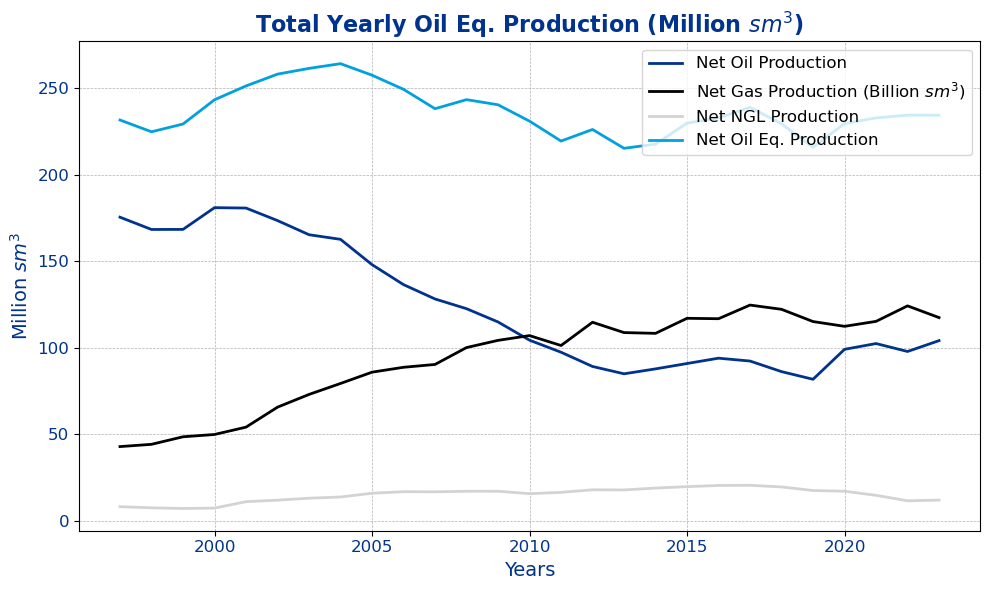

In [16]:
# Plot
plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
net_oil_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .index
)
net_oil_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .values
)

net_gas_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .index
)
net_gas_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .values
)

net_ngl_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .index
)
net_ngl_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .values
)

net_oil_eq_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)
net_oil_eq_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)


plt.plot(net_oil_prod_x, net_oil_prod_y, color="#00338D", linewidth=2)  # Dark blue
plt.plot(net_gas_prod_x, net_gas_prod_y, color="#000000", linewidth=2)  # Black
plt.plot(net_ngl_prod_x, net_ngl_prod_y, color="#D3D3D3", linewidth=2)  # Light gray
plt.plot(net_oil_eq_x, net_oil_eq_y, color="#00A1DE", linewidth=2)  # Light blue

# Titles and labels
plt.title(
    "Total Yearly Oil Eq. Production (Million $sm^3$)",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Million $sm^3$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Legend
plt.legend(
    [
        "Net Oil Production",
        "Net Gas Production (Billion $sm^3$)",
        "Net NGL Production",
        "Net Oil Eq. Production",
    ],
    loc="upper right",
    fontsize=12,
)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

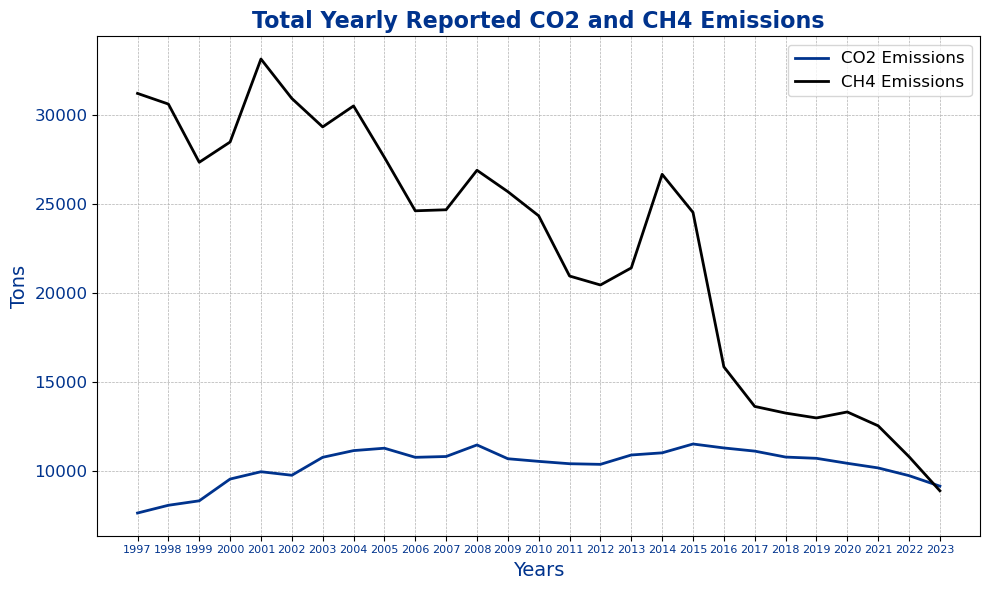

In [43]:
# Plotting the emissions for co2 and ch4

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
co2_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "yearly_co2_emissions_1000_tonnes"
    ]
    .sum()
    .index
)
co2_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "yearly_co2_emissions_1000_tonnes"
    ]
    .sum()
    .values
)

ch4_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["yearly_ch4_emissions_tons"]
    .sum()
    .index
)
ch4_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["yearly_ch4_emissions_tons"]
    .sum()
    .values
)

# Multiplying the ch4 emissions by 25 to get the equivalent in CO2 emissions
# ch4_x = ch4_x * 25

plt.plot(co2_x, co2_y, color="#00338D", linewidth=2)  # Red
plt.plot(ch4_x, ch4_y, color="#000000", linewidth=2)  # Green

# Titles and labels
plt.title(
    "Total Yearly Reported CO2 and CH4 Emissions",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Tons", fontsize=14, color="#00338D")

# Customizing ticks to be every year
plt.xticks(fontsize=8, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Legend
plt.legend(["CO2 Emissions", "CH4 Emissions"], loc="upper right", fontsize=12)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

Text(0, 0.5, 'Tons CO2 per Oil Equivalent')

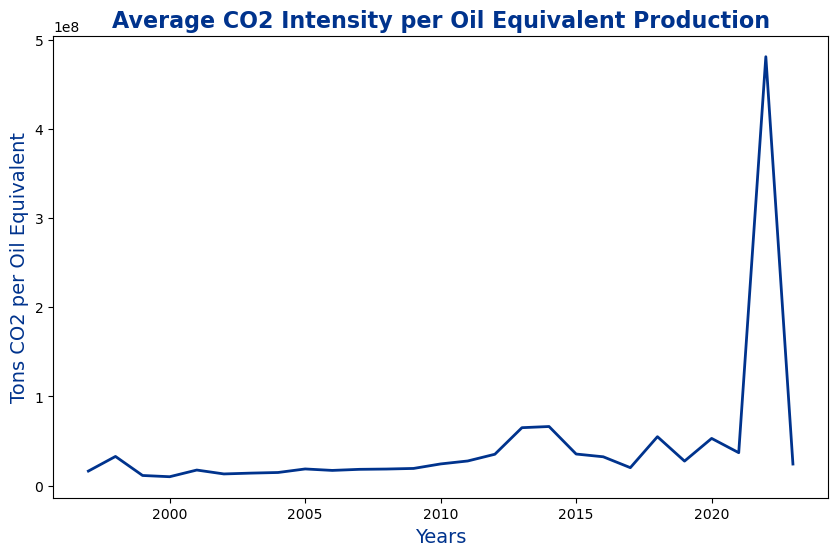

In [21]:
# Plotting the average CO2 intensity per oil equivalent production

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
co2_intensity_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["tco2e/ktoe_gwp100"].sum().index
)
co2_intensity_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["tco2e/ktoe_gwp100"].sum().values
)

plt.plot(co2_intensity_x, co2_intensity_y, color="#00338D", linewidth=2)  # Red

# Titles and labels
plt.title(
    "Average CO2 Intensity per Oil Equivalent Production",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)

plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Tons CO2 per Oil Equivalent", fontsize=14, color="#00338D")

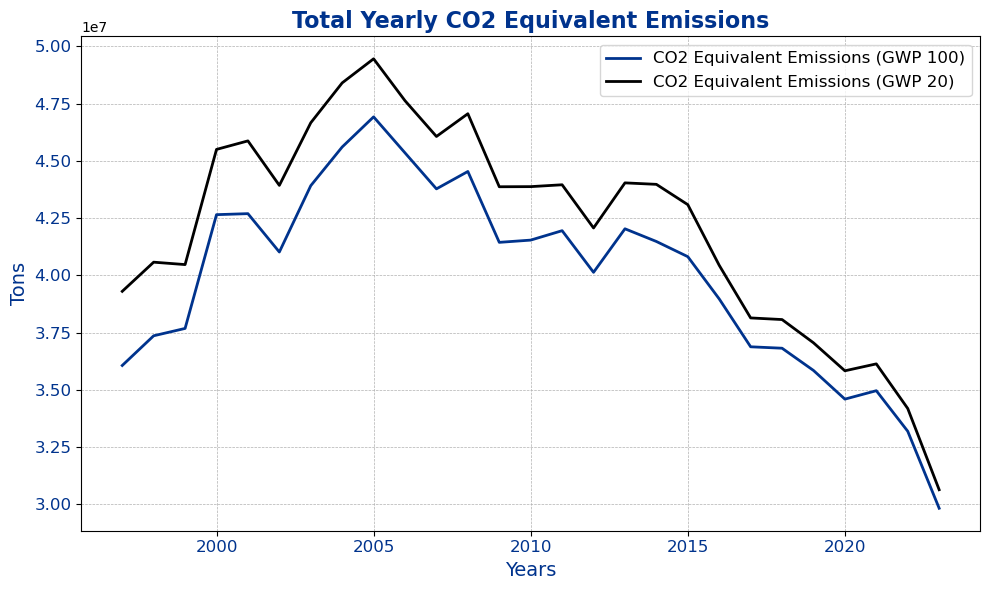

In [37]:
# Plotting the co2e emissions

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
co2e_gwp100_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp100_tons"].sum().index
)
co2e_gwp100_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp100_tons"].sum().values
)

co2e_gwp20_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp20_tons"].sum().index
)
co2e_gwp20_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp20_tons"].sum().values
)

plt.plot(co2e_gwp100_x, co2e_gwp100_y, color="#00338D", linewidth=2)  # Red
plt.plot(co2e_gwp20_x, co2e_gwp20_y, color="#000000", linewidth=2)  # Green

# Titles and labels
plt.title(
    "Total Yearly CO2 Equivalent Emissions",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)

# Labels GWP 100 and GWP 20
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Tons", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Legend
plt.legend(
    ["CO2 Equivalent Emissions (GWP 100)", "CO2 Equivalent Emissions (GWP 20)"],
    loc="upper right",
    fontsize=12,
)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Adding vertical line at 2016 - paris agreement
plt.axvline(x=2016, color="#FF0000", linestyle="--", linewidth=1)

# Adding vertical line at

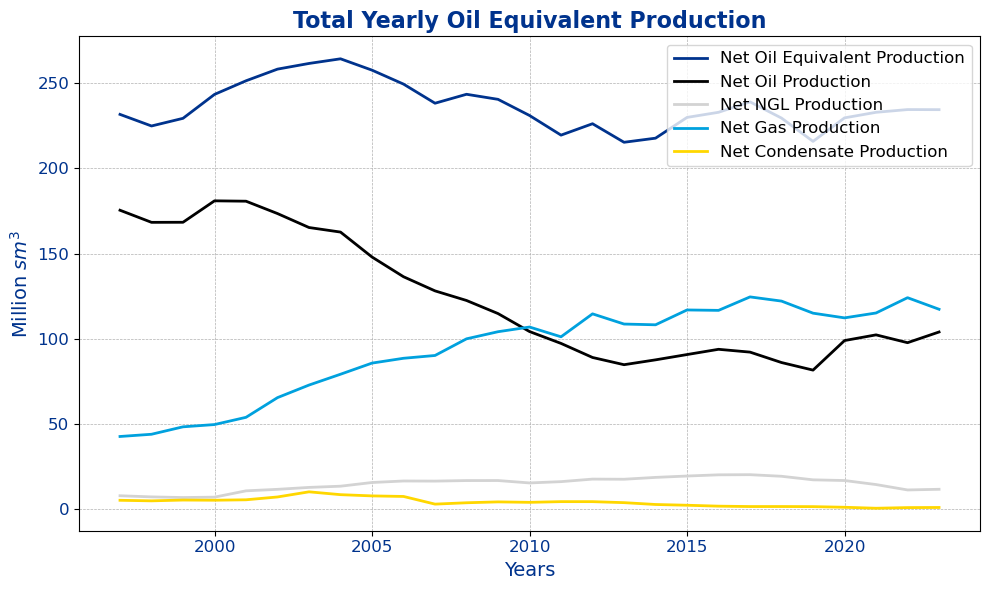

In [40]:
# Plotting yearly production in oil equivalent, oil, ndl, gas and condensate

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
oe_production_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)
oe_production_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)

oil_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .index
)

oil_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .values
)

ngl_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .index
)

ngl_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .values
)

gas_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .index
)

gas_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .values
)

condensate_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_condensate_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)

condensate_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_condensate_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)

plt.plot(oe_production_x, oe_production_y, color="#00338D", linewidth=2)  # Dark blue
plt.plot(oil_prod_x, oil_prod_y, color="#000000", linewidth=2)  # Black
plt.plot(ngl_prod_x, ngl_prod_y, color="#D3D3D3", linewidth=2)  # Light gray
plt.plot(gas_prod_x, gas_prod_y, color="#00A1DE", linewidth=2)  # Light blue
plt.plot(condensate_prod_x, condensate_prod_y, color="#FFD700", linewidth=2)  # Gold

# Titles and labels
plt.title(
    "Total Yearly Oil Equivalent Production",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)

plt.xlabel("Years", fontsize=14, color="#00338D")

plt.ylabel("Million $sm^3$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Legend
plt.legend(
    [
        "Net Oil Equivalent Production",
        "Net Oil Production",
        "Net NGL Production",
        "Net Gas Production",
        "Net Condensate Production",
    ],
    loc="upper right",
    fontsize=12,
)

# Show plot
plt.show()

### Data Export


In [57]:
# Exporting the dataframe to a csv file unless the file exists, check if the export is successful

filename_path = "../../data/output/emissions_and_production/cleaned/fields_prod_emissions_intensities_1997_2023.csv"

if not os.path.exists(filename_path):
    fields_prod_emissions_1997_2023_df.to_csv(filename_path, index=False)
    print("Saved file")
else:
    print("File already exists")

Saved file
